In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import seaborn as sns
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import sklearn
from sklearn.decomposition import PCA
import itertools
import mdtraj as md
import pyblock
from itertools import chain

Naming schemes: 

*nothing* : RegA_noCorN

_DKA : RegA_DKA_noCorN_openMM

_PLM : RegA_PLM_noCorN_openMM

_MYS : RegA_MYSA_noCorN_openMM

Each trajectory is 300ns, strided by 5 to give 6001 frames. These simulations were conducted using Amber ___ forcefields, TiPS3 waters, 300K, and neutralizing NaCl salt.

Current working directory: C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis
Plot saved as C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis\helix_fraction_per_residue.png


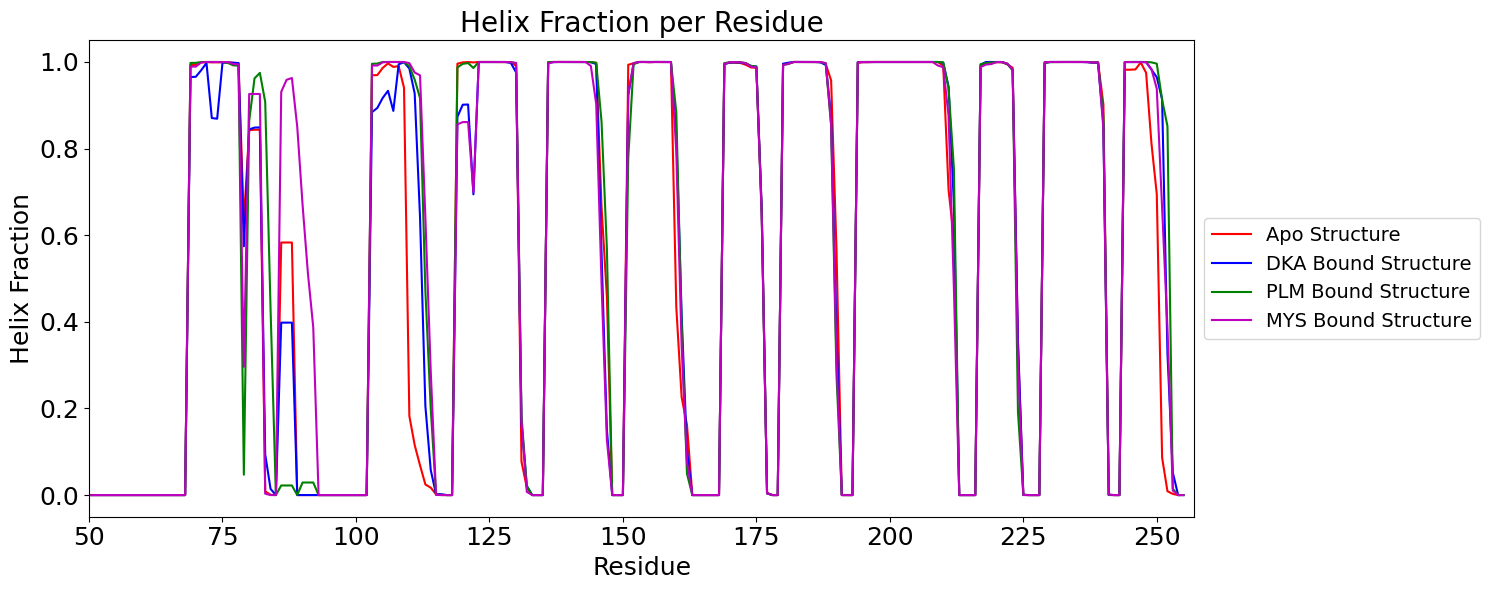

In [49]:
#Here I will plot helix fractions for apo structure and each ligand bound structure 
import os
import numpy as np
import matplotlib.pyplot as plt

print(f"Current working directory: {os.getcwd()}")

# List of full paths to the .dat files containing helix fractions
data_files = [
    './outdir/RegA_noCorN_helix_fractions.dat',
    './outdir_DKA/RegA_DKA_noCorN_helix_fractions.dat',
    './outdir_PLM/RegA_PLM_noCorN_helix_fractions.dat',
    './outdir_MYS/RegA_MYS_noCorN_helix_fractions.dat'
]  

# Descriptive labels for each dataset
labels = [
    'Apo Structure',
    'DKA Bound Structure',
    'PLM Bound Structure',
    'MYS Bound Structure'
]

# Colors for plotting
colors = ['r', 'b', 'g', 'm']

# Initialize the plot
plt.figure(figsize=(15, 6))

# Load and plot each dataset
for i, file_path in enumerate(data_files):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    data = np.loadtxt(file_path, skiprows=1)
    residue_num = data[:, 0]
    helix_fraction = data[:, 1]
    label = labels[i]  # Use the descriptive label
    
    plt.plot(residue_num, helix_fraction, color=colors[i % len(colors)], label=label)

# Customize the plot
plt.xlabel('Residue', size=18)
plt.ylabel('Helix Fraction', size=18)
plt.tick_params(labelsize=18)
plt.title('Helix Fraction per Residue', size=20)
plt.xlim(50, 257)
# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 14})
output_file = os.path.join(os.getcwd(), 'helix_fraction_per_residue.png')
plt.savefig(output_file, bbox_inches='tight')
print(f"Plot saved as {output_file}")
# Show the plot
plt.tight_layout()
plt.show()


Plot saved as C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis\sheet_fraction_per_residue.png


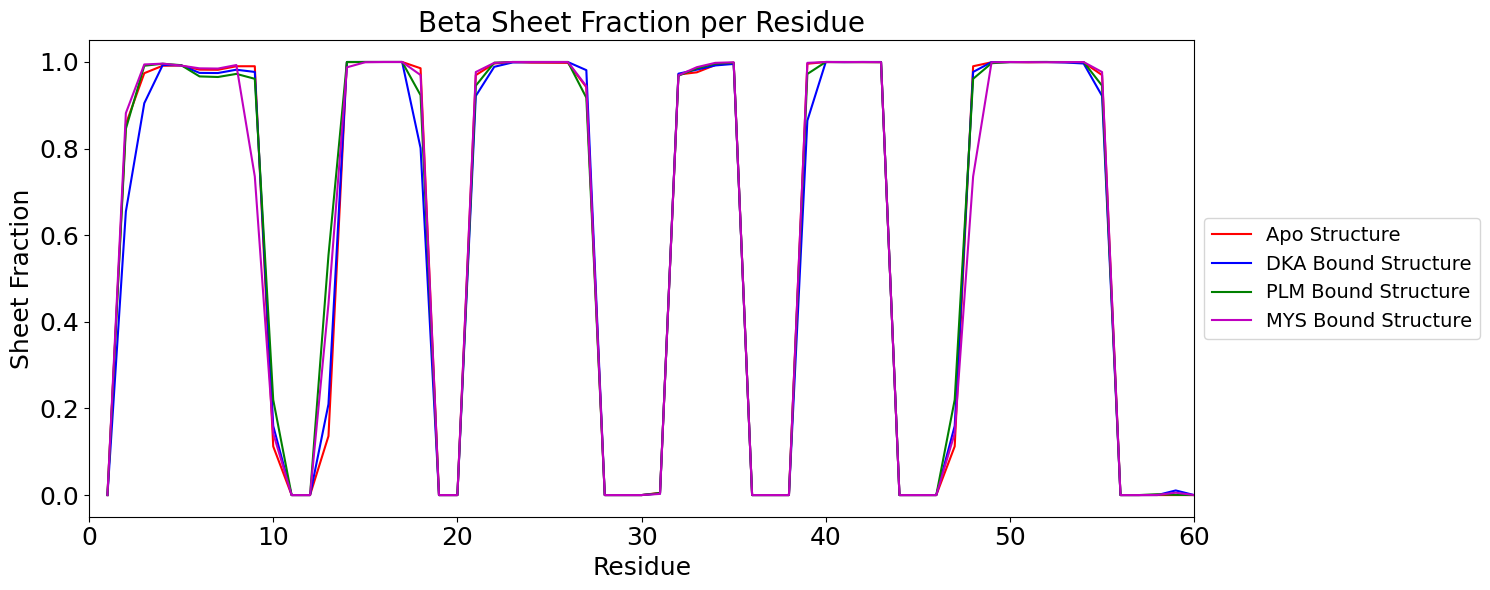

In [50]:

# List of full paths to the .dat files containing sheet fractions
data_files = [
    './outdir/RegA_noCorN_sheet_fractions.dat',
    './outdir_DKA/RegA_DKA_noCorN_sheet_fractions.dat',
    './outdir_PLM/RegA_PLM_noCorN_sheet_fractions.dat',
    './outdir_MYS/RegA_MYS_noCorN_sheet_fractions.dat'
]  

# Descriptive labels for each dataset
labels = [
    'Apo Structure',
    'DKA Bound Structure',
    'PLM Bound Structure',
    'MYS Bound Structure'
]

# Colors for plotting
colors = ['r', 'b', 'g', 'm']

# Initialize the plot
plt.figure(figsize=(15, 6))

# Load and plot each dataset
for i, file_path in enumerate(data_files):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    data = np.loadtxt(file_path, skiprows=1)
    residue_num = data[:, 0]
    sheet_fraction = data[:, 1]
    label = labels[i]  # Use the descriptive label
    
    plt.plot(residue_num, sheet_fraction, color=colors[i % len(colors)], label=label)

# Customize the plot
plt.xlabel('Residue', size=18)
plt.ylabel('Sheet Fraction', size=18)
plt.xlim(0, 60)
plt.tick_params(labelsize=18)
plt.title('Beta Sheet Fraction per Residue', size=20)

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})
output_file = os.path.join(os.getcwd(), 'sheet_fraction_per_residue.png')
plt.savefig(output_file, bbox_inches='tight')
print(f"Plot saved as {output_file}")
# Show the plot
plt.tight_layout()
plt.show()


Plot saved as C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis\rmsd_time.png


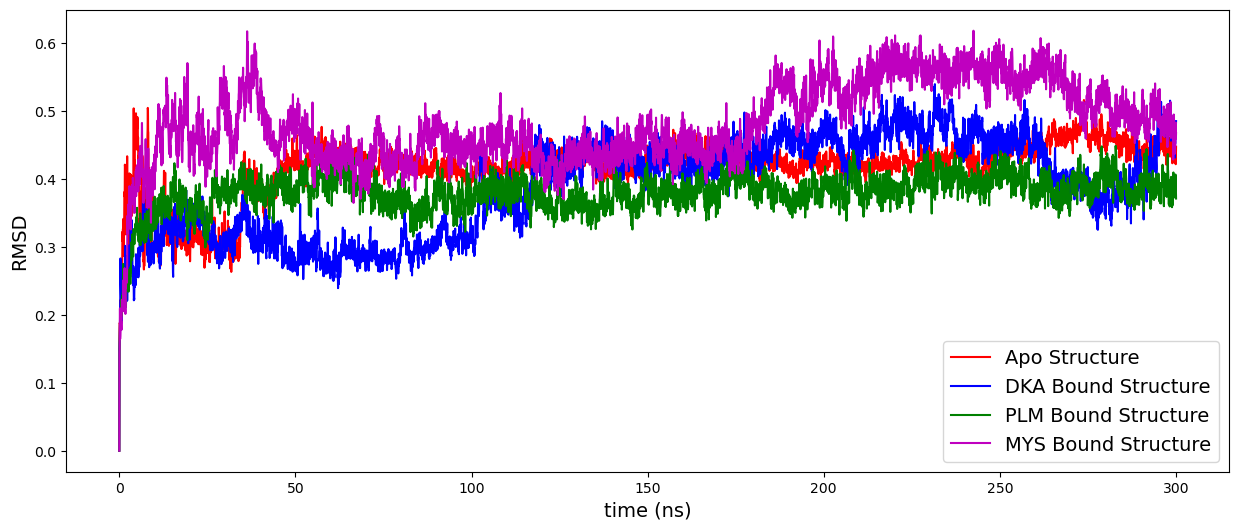

<Figure size 640x480 with 0 Axes>

In [51]:
#This will plot RMSD over time for each structure 
# List of full paths to the .dat files containing sheet fractions
data_files = [
    './outdir/RegA_noCorN_rmsd_data.dat',
    './outdir_DKA/RegA_DKA_noCorN_rmsd_data.dat',
    './outdir_PLM/RegA_PLM_noCorN_rmsd_data.dat',
    './outdir_MYS/RegA_MYS_noCorN_rmsd_data.dat'
]  

# Descriptive labels for each dataset
labels = [
    'Apo Structure',
    'DKA Bound Structure',
    'PLM Bound Structure',
    'MYS Bound Structure'
]

# Colors for plotting
colors = ['r', 'b', 'g', 'm']
# Initialize the plot
plt.figure(figsize=(15, 6))
# Iterate over the .dat files, load data, and plot RMSD
for dat_file, label, color in zip(data_files, labels, colors):
    # Load data from .dat file
    data = np.loadtxt(dat_file, skiprows=1)
    time = data[:, 0]
    rmsd = data[:, 1]

    # Plot RMSD
    plt.plot(time, rmsd, label=label, color=color)

# Add labels and legend
plt.ylabel('RMSD', size=14)
plt.xlabel('time (ns)', size=14)
plt.legend(prop={'size': 14})
output_file = os.path.join(os.getcwd(), 'rmsd_time.png')
plt.savefig(output_file, bbox_inches='tight')
print(f"Plot saved as {output_file}")
plt.show()
plt.clf()


Plot saved as C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis\rg_time.png


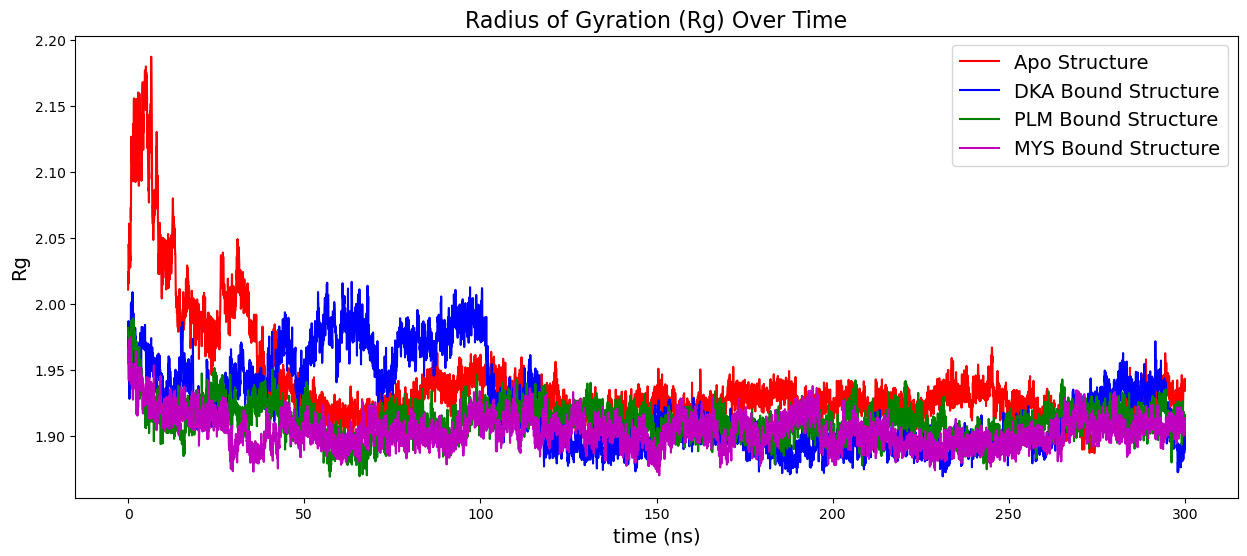

In [52]:
#This will plot Rg over time for each structure 
# List of full paths to the .dat files containing sheet fractions
data_files = [
    './outdir/RegA_noCorN_time_series_Rg.dat',
    './outdir_DKA/RegA_DKA_noCorN_time_series_Rg.dat',
    './outdir_PLM/RegA_PLM_noCorN_time_series_Rg.dat',
    './outdir_MYS/RegA_MYS_noCorN_time_series_Rg.dat'
]  

# Descriptive labels for each dataset
labels = [
    'Apo Structure',
    'DKA Bound Structure',
    'PLM Bound Structure',
    'MYS Bound Structure'
]

# Colors for plotting
colors = ['r', 'b', 'g', 'm']
# Initialize the plot
plt.figure(figsize=(15, 6))
# Iterate over the data files, load the data, and plot
for data_file, label, color in zip(data_files, labels, colors):
    # Load the data from the .dat file
    data = np.loadtxt(data_file, skiprows=1)
    time = data[:, 0]
    rg = data[:, 1]

    # Plot Rg over time
    plt.plot(time, rg, label=label, color=color)

# Add labels and legend
plt.ylabel('Rg', size=14)
plt.xlabel('time (ns)', size=14)
plt.legend(prop={'size': 14})
output_file = os.path.join(os.getcwd(), 'rg_time.png')
plt.savefig(output_file, bbox_inches='tight')
print(f"Plot saved as {output_file}")
plt.title('Radius of Gyration (Rg) Over Time', size=16)
plt.show()

Plot saved as C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis\rg_FES.png


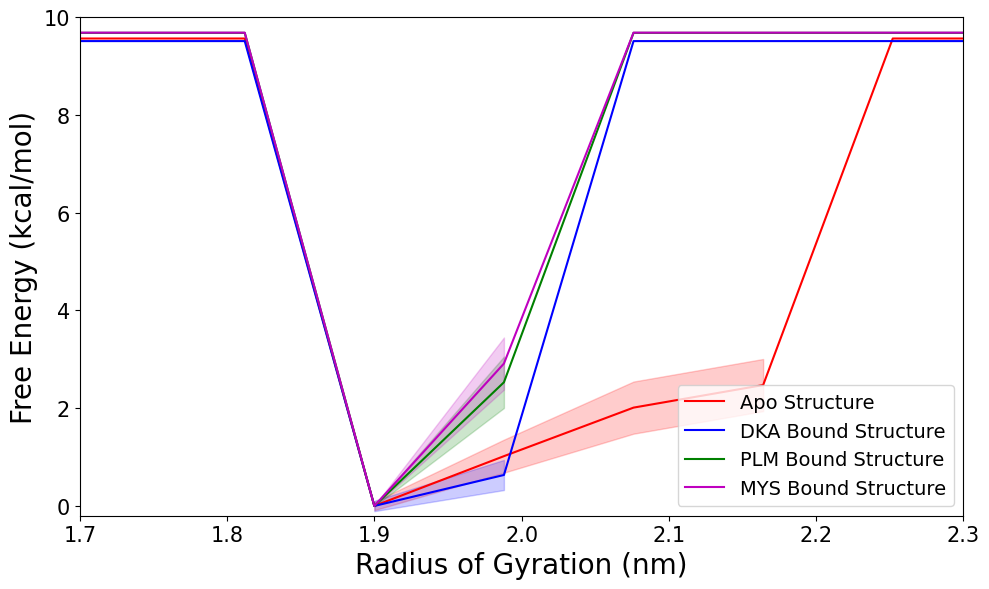

In [54]:
#This will plot Rg as a function of free energy

# List of full paths to the .dat files containing sheet fractions
data_files = [
    './outdirRegA_rg.dG.err.dat',
    './outdir_DKARegA_DKA_rg.dG.err.dat',
    './outdir_PLMRegA_PLM_rg.dG.err.dat',
    './outdir_MYSRegA_MYS_rg.dG.err.dat'
]

# Descriptive labels for each dataset
labels = [
    'Apo Structure',
    'DKA Bound Structure',
    'PLM Bound Structure',
    'MYS Bound Structure'
]

# Colors for plotting
colors = ['r', 'b', 'g', 'm']

# Initialize the plot
plt.figure(figsize=(10, 6))

# Iterate over the data files
for data_file, label, color in zip(data_files, labels, colors):
    # Load the data from the .dat file
    data = np.loadtxt(data_file, skiprows=1)
    bin_centers = data[:, 0]
    dG = data[:, 1]
    ferr = data[:, 2]

    # Plot free energy profile
    sns.lineplot(x=bin_centers, y=dG, label=label, color=color)
    plt.fill_between(bin_centers, dG - ferr, dG + ferr, color=color, alpha=0.2)

# Customize the plot
plt.ylim(-0.2, 10)
plt.xlim(1.7, 2.3)
plt.xlabel('Radius of Gyration (nm)', size=20)
plt.ylabel('Free Energy (kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.tight_layout()
plt.legend(prop={'size': 14})
output_file = os.path.join(os.getcwd(), 'rg_FES.png')
plt.savefig(output_file, bbox_inches='tight')
print(f"Plot saved as {output_file}")
plt.show()

Plot saved as C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis\contact_overres.png


<Figure size 1500x600 with 0 Axes>

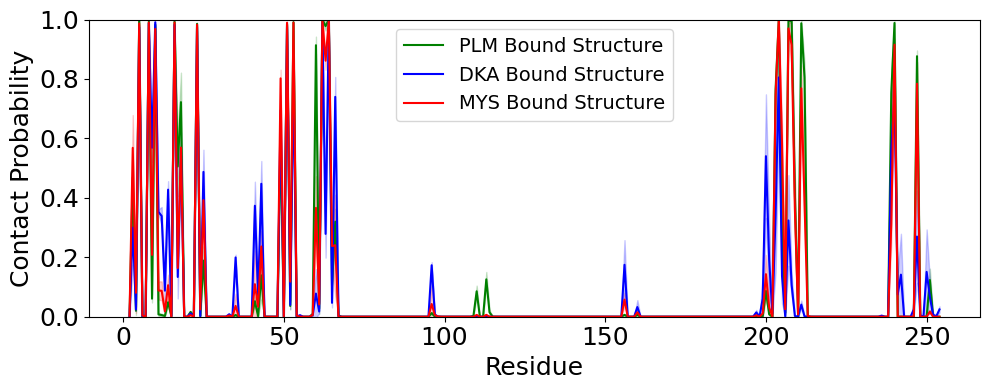

<Figure size 640x480 with 0 Axes>

In [59]:

# List of full paths to the .dat files containing sheet fractions
data_files = [
    './outdir_PLM/RegA_PLM_contact.be.pyblock.dat',
    './outdir_DKA/RegA_DKA_contact.be.pyblock.dat',
    './outdir_MYS/RegA_MYS_contact.be.pyblock.dat'
]

# Descriptive labels for each dataset
labels = [
    'PLM Bound Structure',
    'DKA Bound Structure',
    'MYS Bound Structure'
]

# Colors for plotting
colors = ['g','b', 'r']

# Initialize the plot
plt.figure(figsize=(15, 6))
# Colors for plotting
colors = ['g', 'b', 'r']

# Initialize the plot
plt.figure(figsize=(10, 4))

# Iterate over the data files
for data_file, label, color in zip(data_files, labels, colors):
    # Load the data from the .dat file
    data = np.loadtxt(data_file, skiprows=1)
    residues = data[:, 0]
    contact_prob = data[:, 1]
    contact_error = data[:, 2]

    # Plot contact probability profile
    sns.lineplot(x=residues, y=contact_prob, label=label, color=color)
    plt.fill_between(residues, contact_prob + contact_error, contact_prob - contact_error, color=color, alpha=0.2)

# Customize the plot
plt.xlabel('Residue', size=18)
plt.ylabel('Contact Probability', size=18)
plt.ylim(0, 1)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.legend(prop={'size': 14})
output_file = os.path.join(os.getcwd(), 'contact_overres.png')
plt.savefig(output_file, bbox_inches='tight')
print(f"Plot saved as {output_file}")
plt.show()
plt.clf()

Plot saved as C:\Users\grace\OneDrive - Dartmouth College\Desktop\CHEM_101_S24\Final Project\Analysis\H_bonds_res_lig.png


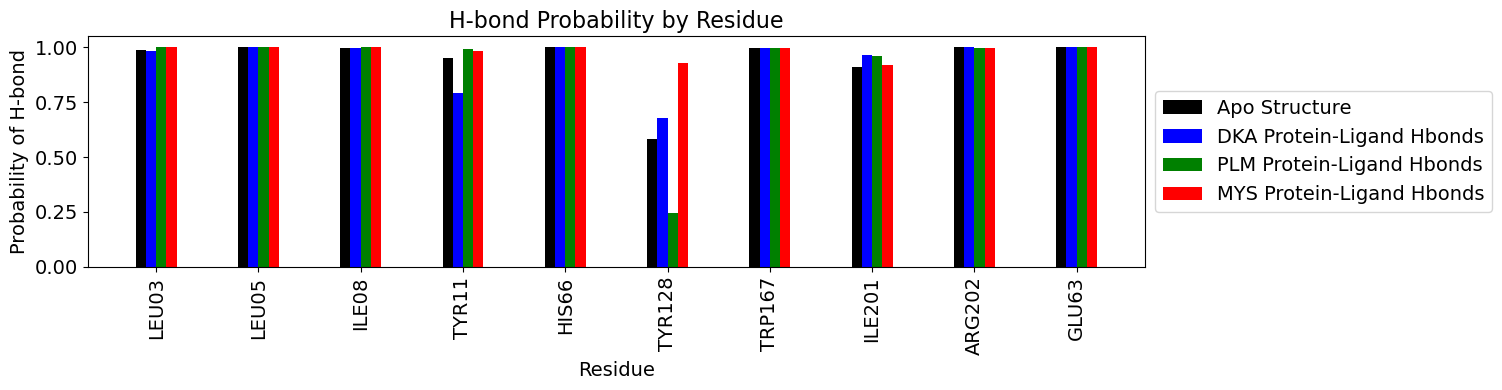

In [3]:
#This will plot the probability of participating in an H-bond when just looking at protein-protein interactions, vs protein-protein and protein-ligand. 

# List of full paths to the .dat files containing H-bond participation probabilities
data_files = [
    './outdir/RegA_noCorN_hbond_prob_interesting_res_data.dat',

    './outdir_DKA/RegA_DKA_noCorN_hbond_prob_interesting_res_data.dat',

    './outdir_PLM/RegA_PLM_noCorN_hbond_prob_interesting_res_data.dat',
   
    './outdir_MYS/RegA_MYS_noCorN_hbond_prob_interesting_res_data.dat'
]

# Descriptive labels for each dataset
labels = [
    'Apo Structure',
    
    'DKA Protein-Ligand Hbonds',
    
    'PLM Protein-Ligand Hbonds',
   
    'MYS Protein-Ligand Hbonds'
]

# Colors for plotting
colors = ['k', 'b', 'g', 'r']

# Initialize a dictionary to store the probabilities by residue
hbond_data = {}
residue_labels = ["LEU03", "LEU05", "ILE08", "TYR11", "HIS66", "TYR128", "TRP167", "ILE201", "ARG202", "GLU63"]
# Load the data from each file
for data_file, label in zip(data_files, labels):
    data = np.loadtxt(data_file, skiprows=1)
    residues = data[:, 0].astype(int)
    probabilities = data[:, 1]

    for residue, probability in zip(residues, probabilities):
        if residue not in hbond_data:
            hbond_data[residue] = {}
        hbond_data[residue][label] = probability

# Sort residues for consistent plotting
sorted_residues = sorted(hbond_data.keys())

# Prepare the data for plotting
residues_list = []
probabilities_list = {label: [] for label in labels}

for residue in sorted_residues:
    residues_list.append(f'Res{residue}')
    for label in labels:
        probabilities_list[label].append(hbond_data[residue].get(label, 0))

# Plot the grouped bar graph
x = np.arange(len(residues_list))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 4))

# Plot each dataset as a group of bars
for i, label in enumerate(labels):
    ax.bar(x + i * width, probabilities_list[label], width, label=label, color=colors[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Residue', size=14)
ax.set_ylabel('Probability of H-bond', size=14)
ax.set_title('H-bond Probability by Residue', size=16)
ax.set_xticks(x + width * (len(labels) - 1) / 2)
ax.set_xticklabels(residue_labels, rotation=90, fontsize=14)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 14})
ax.tick_params(axis='y', labelsize=14)
output_file = os.path.join(os.getcwd(), 'H_bonds_res_lig.png')
plt.savefig(output_file, bbox_inches='tight')
print(f"Plot saved as {output_file}")
fig.tight_layout()

plt.show()
